In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from math import isnan

# Overview of data

In [ ]:
file = 'NY property data.csv'
myData = pd.read_csv(file)

In [ ]:
myData.head(6)

In [ ]:
myData.isnull().sum()

In [ ]:
myData2 = myData.copy()
myData2

In [ ]:
del_attribute = ['RECORD', 'BBLE', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'EXT', 
                 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'EXMPTCL', 'AVLAND2', 'AVTOT2',
                 'EXLAND2', 'EXTOT2', 'EXCD2', 'YEAR', 'VALTYPE', 'PERIOD']

In [ ]:
for del_i in del_attribute: 
    myData2.drop([del_i], axis = 1, inplace= True)

In [ ]:
myData2.head(6)

# Fill up missing value

In [ ]:
myData3 = myData2.copy()

In [ ]:
myData3.head(6)

In [ ]:
myData3.dtypes

In [ ]:
#myData3['BLOCK'] = pd.Categorical(myData3['BLOCK'])
#myData3['B'] = pd.Categorical(myData3['B'])
#myData3['TAXCLASS'] = pd.Categorical(myData3['TAXCLASS'])
#myData3['STORIES'] = pd.Categorical(myData3['STORIES'])
#myData3['ZIP'] = pd.Categorical(myData3['ZIP'])

In [ ]:
myData3.dtypes

## ZIP

### Use the mode of ZIP Code below and above (2 above and 2 below)

In [ ]:
attribute = 'ZIP'

print('Describe')
print(myData3[attribute].describe())

print('Value Counts')
print(myData3[attribute].value_counts().index[0:6])

print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())


In [ ]:
index_missing_value = myData3[myData3['ZIP'].isnull()].index
for i in index_missing_value:
    flag = True
    temp = [] 
    if myData3.loc[(i-2),['ZIP']].isnull().values[0] == True:
        flag = False
    else:
        temp.append(myData3.loc[(i-2),'ZIP'])
    if myData3.loc[(i-1),['ZIP']].isnull().values[0] == True:
        flag = False
    else:
        temp.append(myData3.loc[(i-1),'ZIP'])
    if myData3.loc[(i+1),['ZIP']].isnull().values[0] == True:
        flag = False
    else:
        temp.append(myData3.loc[(i+1),'ZIP'])
    if myData3.loc[(i+2),['ZIP']].isnull().values[0] == True:
        flag = False
    else:
        temp.append(myData3.loc[(i+2),'ZIP'])
    if(flag == True):
        myData3.loc[i, 'ZIP'] = sps.mode(temp)[0][0]
print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

### Aggregate by B, TAXCLASS. Use the mode of that group

In [ ]:
valid_index = myData3[myData3['ZIP'].isnull() == False].copy()
print('Null Value Number Counts')
print(valid_index[attribute].isnull().sum())
valid_index.head(2)

In [ ]:
def f_mode (x):
    return x.value_counts().index[0]

valid_dataframe = valid_index[['ZIP', 'B', 'TAXCLASS']].copy()
temp = valid_dataframe.groupby(['B','TAXCLASS']).agg(f_mode).copy()

for i in myData3[myData3['ZIP'].isnull() == True].index:
    try:
        temp_B = myData3.loc[i,'B']
        temp_TAXCLASS = myData3.loc[i,'TAXCLASS']
        myData3.loc[i, 'ZIP'] = temp.loc[temp_B,].loc[temp_TAXCLASS, 'ZIP']
    except:
        continue
print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

In [ ]:
def f_mode (x):
    return x.value_counts().index[0]

valid_dataframe = valid_index[[attribute, 'B']].copy()
temp = valid_dataframe.groupby(['B']).agg(f_mode).copy()

for i in myData3[myData3['ZIP'].isnull() == True].index:
    try:
        temp_B = myData3.loc[i,'B']
        myData3.loc[i, 'ZIP'] = temp.loc[temp_B,attribute]
    except:
        continue
print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

## TAXCLASS

In [ ]:
attribute = 'TAXCLASS'

print('Describe')
print(myData3[attribute].describe())

print('Value Counts')
print(myData3[attribute].value_counts().index[0:6])

print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

## BOROUGH(B)

In [ ]:
attribute = 'B'

print('Describe')
print(myData3[attribute].describe())

print('Value Counts')
print(myData3[attribute].value_counts().index[0:6])

print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

## STORIES

In [ ]:
attribute = 'STORIES'

print('Describe')
print(myData3[attribute].describe())

print('Value Counts')
print(myData3[attribute].value_counts().index[0:6])

print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

In [ ]:
valid_index = myData3[myData3[attribute].isnull() == False].copy()
print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

In [ ]:
def f_mode (x):
    return x.value_counts().index[0]

valid_dataframe = valid_index[[attribute, 'ZIP','B']].copy()
temp = valid_dataframe.groupby(['ZIP', 'B']).agg(f_mode).copy()
temp.head(2)

In [ ]:
for i in myData3[myData3[attribute].isnull() == True].index:
    try:
        temp_B = myData3.loc[i,'B']
        temp_ZIP = myData3.loc[i,'ZIP']
        myData3.loc[i, attribute] = temp.loc[temp_ZIP,].loc[temp_B,attribute]
    except:
        continue
print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

In [ ]:
def f_mode (x):
    return x.value_counts().index[0]

valid_dataframe = valid_index[[attribute, 'B']].copy()
temp = valid_dataframe.groupby(['B']).agg(f_mode).copy()
temp.head(2)

In [ ]:
for i in myData3[myData3[attribute].isnull() == True].index:
    try:
        temp_B = myData3.loc[i,'B']
        myData3.loc[i, attribute] = temp.loc[temp_B,attribute]
    except:
        continue
print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

## LTFRONT

In [ ]:
attribute = 'LTFRONT'

print('Describe')
print(myData3[attribute].describe())

print('Value Counts')
print(myData3[attribute].value_counts().index[0:6])

print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

In [ ]:
valid_index = myData3[myData3[attribute] != 0].copy()
print('0 Value Number Counts')
print(len(valid_index[valid_index[attribute] == 0]))

In [ ]:
valid_dataframe = valid_index[[attribute, 'ZIP']].copy()
temp = valid_dataframe.groupby(['ZIP']).median().copy()
temp.head(2)

In [ ]:
for i in myData3[myData3[attribute] == 0].index:
    try:
        temp_ZIP = myData3.loc[i,'ZIP']
        #temp_STORIES = myData3.loc[i,'STORIES']
        myData3.loc[i, attribute] = temp.loc[temp_ZIP,attribute]
    except:
        continue
print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

## LTDEPTH

In [ ]:
attribute = 'LTDEPTH'

print('Describe')
print(myData3[attribute].describe())

print('Value Counts')
print(myData3[attribute].value_counts().index[0:6])

print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

In [ ]:
valid_index = myData3[myData3[attribute] != 0].copy()
print('0 Value Number Counts')
print(len(valid_index[valid_index[attribute] == 0]))

In [ ]:
valid_dataframe = valid_index[[attribute, 'ZIP']].copy()
temp = valid_dataframe.groupby(['ZIP']).median().copy()
temp.head(2)

In [ ]:
for i in myData3[myData3[attribute] == 0].index:
    try:
        temp_ZIP = myData3.loc[i,'ZIP']
        #temp_STORIES = myData3.loc[i,'STORIES']
        myData3.loc[i, attribute] = temp.loc[temp_ZIP,attribute]
    except:
        continue
print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

## BLDFRONT 

In [ ]:
attribute = 'BLDFRONT'

print('Describe')
print(myData3[attribute].describe())

print('Value Counts')
print(myData3[attribute].value_counts().index[0:6])

print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

In [ ]:
valid_index = myData3[myData3[attribute] != 0].copy()
print('0 Value Number Counts')
print(len(valid_index[valid_index[attribute] == 0]))

In [ ]:
valid_dataframe = valid_index[[attribute, 'ZIP']].copy()
temp = valid_dataframe.groupby(['ZIP']).median().copy()
temp.head(2)

In [ ]:
for i in myData3[myData3[attribute] == 0].index:
    try:
        temp_ZIP = myData3.loc[i,'ZIP']
        #temp_STORIES = myData3.loc[i,'STORIES']
        myData3.loc[i, attribute] = temp.loc[temp_ZIP,attribute]
    except:
        continue
print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

In [ ]:
valid_dataframe = valid_index[[attribute, 'B']].copy()
temp = valid_dataframe.groupby(['B']).median().copy()
temp.head(2)

In [ ]:
for i in myData3[myData3[attribute] == 0].index:
    try:
        temp_B = myData3.loc[i,'B']
        #temp_STORIES = myData3.loc[i,'STORIES']
        myData3.loc[i, attribute] = temp.loc[temp_B,attribute]
    except:
        continue
print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

## BLDDEPTH  

In [ ]:
attribute = 'BLDDEPTH'

print('Describe')
print(myData3[attribute].describe())

print('Value Counts')
print(myData3[attribute].value_counts().index[0:6])

print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

In [ ]:
valid_index = myData3[myData3[attribute] != 0].copy()
print('0 Value Number Counts')
print(len(valid_index[valid_index[attribute] == 0]))

In [ ]:
valid_dataframe = valid_index[[attribute, 'ZIP']].copy()
temp = valid_dataframe.groupby(['ZIP']).median().copy()
temp.head(2)

In [ ]:
for i in myData3[myData3[attribute] == 0].index:
    try:
        temp_ZIP = myData3.loc[i,'ZIP']
        #temp_STORIES = myData3.loc[i,'STORIES']
        myData3.loc[i, attribute] = temp.loc[temp_ZIP,attribute]
    except:
        continue
print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

In [ ]:
valid_dataframe = valid_index[[attribute, 'B']].copy()
temp = valid_dataframe.groupby(['B']).median().copy()
temp.head(2)

In [ ]:
for i in myData3[myData3[attribute] == 0].index:
    try:
        temp_B = myData3.loc[i,'B']
        #temp_STORIES = myData3.loc[i,'STORIES']
        myData3.loc[i, attribute] = temp.loc[temp_B,attribute]
    except:
        continue
print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

## AVTOT

In [ ]:
attribute = 'AVTOT'

print('Describe')
print(myData3[attribute].describe())

print('Value Counts')
print(myData3[attribute].value_counts().index[0:6])

print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

In [ ]:
valid_index = myData3[myData3[attribute] != 0].copy()
print('0 Value Number Counts')
print(len(valid_index[valid_index[attribute] == 0]))

In [ ]:
valid_dataframe = valid_index[[attribute, 'ZIP']].copy()
temp = valid_dataframe.groupby(['ZIP']).median().copy()
temp.head(2)

In [ ]:
for i in myData3[myData3[attribute] == 0].index:
    try:
        temp_ZIP = myData3.loc[i,'ZIP']
        #temp_STORIES = myData3.loc[i,'STORIES']
        myData3.loc[i, attribute] = temp.loc[temp_ZIP,attribute]
    except:
        continue
print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

## FULLVALUE 

In [ ]:
attribute = 'FULLVAL'

print('Describe')
print(myData3[attribute].describe())

print('Value Counts')
print(myData3[attribute].value_counts().index[0:6])

print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

In [ ]:
valid_index = myData3[myData3[attribute] != 0].copy()
print('0 Value Number Counts')
print(len(valid_index[valid_index[attribute] == 0]))

In [ ]:
valid_dataframe = valid_index[[attribute, 'ZIP']].copy()
temp = valid_dataframe.groupby(['ZIP']).median().copy()
temp.head(2)

In [ ]:
for i in myData3[myData3[attribute] == 0].index:
    try:
        temp_ZIP = myData3.loc[i,'ZIP']
        #temp_STORIES = myData3.loc[i,'STORIES']
        myData3.loc[i, attribute] = temp.loc[temp_ZIP,attribute]
    except:
        continue
print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

## AVLAND

In [ ]:
attribute = 'AVLAND'

print('Describe')
print(myData3[attribute].describe())

print('Value Counts')
print(myData3[attribute].value_counts().index[0:6])

print('Null Value Number Counts')
print(myData3[attribute].isnull().sum())

print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

In [ ]:
valid_index = myData3[myData3[attribute] != 0].copy()
print('0 Value Number Counts')
print(len(valid_index[valid_index[attribute] == 0]))

In [ ]:
valid_dataframe = valid_index[[attribute, 'ZIP']].copy()
temp = valid_dataframe.groupby(['ZIP']).median().copy()
temp.head(2)

In [ ]:
for i in myData3[myData3[attribute] == 0].index:
    try:
        temp_ZIP = myData3.loc[i,'ZIP']
        #temp_STORIES = myData3.loc[i,'STORIES']
        myData3.loc[i, attribute] = temp.loc[temp_ZIP,attribute]
    except:
        continue
print('0 Value Counts')
print(len(myData3[myData3[attribute] == 0]))

In [ ]:
myData3.drop('Unnamed: 0', axis = 1 , inplace= True)

In [ ]:
myData3.head(2)

In [ ]:
myData3.to_csv('cleanData_yifeng.csv')

# Build 'expert variable'

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [ ]:
file = 'cleanData_yifeng.csv'
myData4 = pd.read_csv(file)
myData4.drop('Unnamed: 0', axis = 1 , inplace= True)

In [ ]:
myData4.head(10).T

In [ ]:
myData4['Base_lotarea'] = myData4['LTFRONT'] * myData4['LTDEPTH']
myData4['Base_bldarea'] = myData4['BLDFRONT'] * myData4['BLDDEPTH']
myData4['Base_bldvol'] = myData4['Base_bldarea'] * myData4['STORIES']

myData4['Base_r1'] = myData4['FULLVAL'] / myData4['Base_lotarea']
myData4['Base_r2'] = myData4['AVLAND'] / myData4['Base_lotarea']
myData4['Base_r3'] = myData4['AVTOT'] / myData4['Base_lotarea']

myData4['Base_r4'] = myData4['FULLVAL'] / myData4['Base_bldarea']
myData4['Base_r5'] = myData4['AVLAND'] / myData4['Base_bldarea']
myData4['Base_r6'] = myData4['AVTOT'] / myData4['Base_bldarea']

myData4['Base_r7'] = myData4['FULLVAL'] / myData4['Base_bldvol']
myData4['Base_r8'] = myData4['AVLAND'] / myData4['Base_bldvol']
myData4['Base_r9'] = myData4['AVTOT'] / myData4['Base_bldvol']

In [ ]:
Base_list = ['Base_r1', 'Base_r2', 'Base_r3', 'Base_r4', 'Base_r5', 'Base_r6', 'Base_r7', 'Base_r8', 'Base_r9']

## Group by ZIP5

In [ ]:
attribute = 'ZIP'
temp = myData4.groupby([attribute]).mean().copy()
def df2dict (x):
    return temp_dict[x]
temp.head(10)

In [ ]:
for Base_i in Base_list:
    temp_dict = temp[Base_i].to_dict()
    
    temp_attribute_name = 'Expert' + Base_i + attribute
    myData4[temp_attribute_name] = myData4[Base_i] / myData4[attribute].apply(df2dict)

## Group by ZIP3

In [ ]:
myData4['ZIP3'] = myData4['ZIP'] / 100
myData4['ZIP3'].astype(int)
attribute = 'ZIP3'
temp = myData4.groupby([attribute]).mean().copy()
def df2dict (x):
    return temp_dict[x]

In [ ]:
for Base_i in Base_list:
    temp_dict = temp[Base_i].to_dict()
    temp_attribute_name = 'Expert' + Base_i + attribute
    myData4[temp_attribute_name] = myData4[Base_i] / myData4[attribute].apply(df2dict)

## Group by TAXCLASS

In [ ]:
attribute = 'TAXCLASS'
temp = myData4.groupby([attribute]).mean().copy()
def df2dict (x):
    return temp_dict[x]

In [ ]:
for Base_i in Base_list:
    temp_dict = temp[Base_i].to_dict()
    temp_attribute_name = 'Expert' + Base_i + attribute
    myData4[temp_attribute_name] = myData4[Base_i] / myData4[attribute].apply(df2dict)

## Group by B

In [ ]:
attribute = 'B'
temp = myData4.groupby([attribute]).mean().copy()
def df2dict (x):
    return temp_dict[x]

In [ ]:
for Base_i in Base_list:
    temp_dict = temp[Base_i].to_dict()
    temp_attribute_name = 'Expert' + Base_i + attribute
    myData4[temp_attribute_name] = myData4[Base_i] / myData4[attribute].apply(df2dict)

## Group by All

In [ ]:
attribute = 'ALL'

In [ ]:
for Base_i in Base_list:
    temp_attribute_name = 'Expert' + Base_i + attribute
    myData4[temp_attribute_name] = myData4[Base_i] / myData4[Base_i].mean()

## Delete Inrelated Attribute

In [ ]:
del_attribute = ['B','BLOCK','TAXCLASS','LTFRONT','LTDEPTH','STORIES','FULLVAL','AVLAND','ZIP3'
                ,'AVTOT','ZIP','BLDFRONT','BLDDEPTH','Base_lotarea','Base_bldarea','Base_bldvol'
                ,'Base_r1','Base_r2','Base_r3','Base_r4','Base_r5','Base_r6','Base_r7','Base_r8','Base_r9']

In [ ]:
for del_i in del_attribute: 
    myData4.drop([del_i], axis = 1, inplace= True)

In [ ]:
del_attribute = ['RECORD', 'BBLE', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'EXT', 
                 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'EXMPTCL', 'AVLAND2', 'AVTOT2',
                 'EXLAND2', 'EXTOT2', 'EXCD2', 'YEAR', 'VALTYPE', 'PERIOD']

In [ ]:
for del_i in del_attribute: 
    myData4.drop([del_i], axis = 1, inplace= True)

In [ ]:
myData4.shape

In [ ]:
myData4.to_csv('expertVariableData_yifeng(yifengData2).csv')

# Z-scale all variable

In [175]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing 

In [176]:
file = 'expertVariableData_yifeng(yifengData).csv'
myData4 = pd.read_csv(file)
myData4.drop('Unnamed: 0', axis = 1 , inplace= True)

In [177]:
myData5 = myData4.copy()

In [178]:
myData4.head(3)

,ExpertBase_r1ZIP,ExpertBase_r2ZIP,ExpertBase_r3ZIP,ExpertBase_r4ZIP,ExpertBase_r5ZIP,ExpertBase_r6ZIP,ExpertBase_r7ZIP,ExpertBase_r8ZIP,ExpertBase_r9ZIP,ExpertBase_r1ZIP3,...,ExpertBase_r9B,ExpertBase_r1ALL,ExpertBase_r2ALL,ExpertBase_r3ALL,ExpertBase_r4ALL,ExpertBase_r5ALL,ExpertBase_r6ALL,ExpertBase_r7ALL,ExpertBase_r8ALL,ExpertBase_r9ALL
0,0.119240,0.166497,0.129191,3.022971,2.727065,3.205864,0.237611,0.121950,0.249221,0.119240,...,0.391914,0.189376,0.766642,0.684654,2.277140,6.337456,7.778809,0.114565,0.315934,0.459889
1,119.525538,62.411945,129.500999,27.376252,9.235427,29.032542,2.151819,0.412992,2.256960,119.525538,...,3.549204,189.829606,287.378153,686.294968,20.621954,21.462312,70.445476,1.037514,1.069935,4.164791
2,0.762908,2.010324,0.826579,0.561378,0.955708,0.595342,0.647170,0.626818,0.678792,0.762908,...,1.067440,1.211645,9.256612,4.380484,0.422874,2.220981,1.444556,0.312037,1.623892,1.252581


In [179]:
for index in myData5:
    myData5[index] = skl.preprocessing.scale(myData4[index])

In [180]:
myData5.head(3)

,ExpertBase_r1ZIP,ExpertBase_r2ZIP,ExpertBase_r3ZIP,ExpertBase_r4ZIP,ExpertBase_r5ZIP,ExpertBase_r6ZIP,ExpertBase_r7ZIP,ExpertBase_r8ZIP,ExpertBase_r9ZIP,ExpertBase_r1ZIP3,...,ExpertBase_r9B,ExpertBase_r1ALL,ExpertBase_r2ALL,ExpertBase_r3ALL,ExpertBase_r4ALL,ExpertBase_r5ALL,ExpertBase_r6ALL,ExpertBase_r7ALL,ExpertBase_r8ALL,ExpertBase_r9ALL
0,-0.187137,-0.075686,-0.118082,0.217863,0.080125,0.122362,-0.075585,-0.038927,-0.039976,-0.187137,...,-0.009372,-0.144666,-0.013868,-0.035370,0.085516,0.062323,0.086385,-0.060768,-0.007991,-0.007138
1,25.183320,5.576513,17.424791,2.840574,0.382073,1.554998,0.114195,-0.026024,0.066929,25.183320,...,0.039291,33.699070,17.018300,76.864514,1.313870,0.238929,0.884974,0.002575,0.000817,0.041826
2,-0.050375,0.091742,-0.023516,-0.047237,-0.002055,-0.022447,-0.034981,-0.016544,-0.017103,-0.050375,...,0.001039,0.037771,0.490657,0.379164,-0.038644,0.014257,0.005665,-0.047215,0.007288,0.003338


In [181]:
for index in myData5:
    print(index)
    print (myData5[index].mean(), myData5[index].std())

ExpertBase_r1ZIP
-2.6772799859185946e-17 1.0000004668563391
ExpertBase_r2ZIP
4.880171507081207e-17 1.000000466856326
ExpertBase_r3ZIP
8.791813126431981e-17 1.000000466856387
ExpertBase_r4ZIP
9.62364927791047e-17 1.0000004668563813
ExpertBase_r5ZIP
2.6019151420834097e-18 1.0000004668563716
ExpertBase_r6ZIP
2.5797053740524084e-17 1.000000466856414
ExpertBase_r7ZIP
3.9993714988589935e-17 1.0000004668563625
ExpertBase_r8ZIP
5.6078627649664864e-18 1.0000004668563625
ExpertBase_r9ZIP
-2.037498073870141e-17 1.0000004668563303
ExpertBase_r1ZIP3
-2.6772799859185946e-17 1.0000004668563391
ExpertBase_r2ZIP3
4.880171507081207e-17 1.000000466856326
ExpertBase_r3ZIP3
8.791813126431981e-17 1.000000466856387
ExpertBase_r4ZIP3
9.62364927791047e-17 1.0000004668563813
ExpertBase_r5ZIP3
2.6019151420834097e-18 1.0000004668563716
ExpertBase_r6ZIP3
2.5797053740524084e-17 1.000000466856414
ExpertBase_r7ZIP3
3.9993714988589935e-17 1.0000004668563625
ExpertBase_r8ZIP3
5.6078627649664864e-18 1.0000004668563625
E

# PCA

In [182]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [183]:
myData6 = myData5.copy()

In [184]:
pca_modle = PCA(n_components = 15)
myData6 = pca_modle.fit_transform(myData6)

In [185]:
y = pca_modle.explained_variance_ratio_
pca_modle.explained_variance_ratio_

array([0.50097735, 0.22722943, 0.07224364, 0.05208972, 0.04411291,
       0.04045688, 0.01658566, 0.0097775 , 0.00806087, 0.0051208 ,
       0.00489789, 0.00447862, 0.00317243, 0.0023302 , 0.00195961])

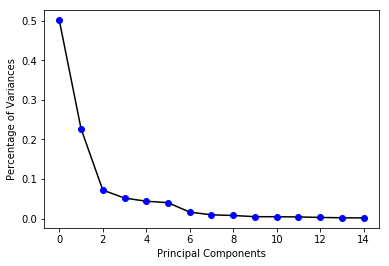

In [206]:
plt.plot(list(range(0,15,1)),y,'k',list(range(0,15,1)),y,'bo')
plt.ylabel('Percentage of Variances')
plt.xlabel('Principal Components')
plt.savefig('PCA.png')

In [ ]:
'''plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()'''

we choose 6 as our desired dimension 

In [187]:
myData6 = myData5.copy()
pca_modle = PCA(n_components = 6)
myData6 = pca_modle.fit_transform(myData6)
myData7 = pd.DataFrame(myData6).copy()

# Z-scale again

In [ ]:
for index in myData7:
    myData7[index] = skl.preprocessing.scale(myData7[index])

In [ ]:
for index in myData7:
    print(index)
    print (myData7[index].mean(), myData7[index].std())

In [ ]:
myData7.to_csv('zScaleAfterPCA_yifeng(yifengData).csv')

# Modeling

## Outlier detection via z-scores

In [24]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing 

In [25]:
file = 'zScaleAfterPCA_yifeng(yifengData).csv'
myData8 = pd.read_csv(file)
myData8.drop('Unnamed: 0', axis = 1 , inplace= True)

In [28]:
myData8.head(2)

,0,1,2,3,4,5
0,0.004199,-0.120170,-0.126649,-0.063994,0.067439,0.129863
1,6.109354,22.719222,6.424920,-0.221121,0.735808,2.137036


In [27]:
myData9 = myData8.copy()

In [30]:
myData9['Score1'] = abs(myData8['0']) +abs(myData8['1']) +abs(myData8['2'])+ \
                            abs(myData8['3']) + abs(myData8['4']) +abs(myData8['5'])

In [31]:
myData9.head(2)

,0,1,2,3,4,5,Score1
0,0.004199,-0.120170,-0.126649,-0.063994,0.067439,0.129863,0.512314
1,6.109354,22.719222,6.424920,-0.221121,0.735808,2.137036,38.347460


## autoencoder error

In [32]:
!pip install keras
!pip install Tensorflow

In [33]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [34]:
from sklearn.model_selection import train_test_split
seed = 46
data_train, data_test = train_test_split(myData8, test_size=0.2, random_state=seed)

In [35]:
data_train.shape

(856795, 6)

In [36]:
data_test.shape

(214199, 6)

In [37]:
input_dim =data_train.shape[1]
encoding_dim = int(input_dim/2)

In [38]:
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [39]:
nb_epoch = 50
batch_size = 500
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
history = autoencoder.fit(data_train, data_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(data_test, data_test),
                    verbose=1)

Train on 856795 samples, validate on 214199 samples
Epoch 1/50
856795/856795 [==============================] - 2s 3us/step - loss: 0.7680 - acc: 0.1803 - val_loss: 1.9237 - val_acc: 0.0877
Epoch 2/50
856795/856795 [==============================] - 2s 2us/step - loss: 0.7600 - acc: 0.0943 - val_loss: 1.9183 - val_acc: 0.0944
Epoch 3/50
856795/856795 [==============================] - 2s 2us/step - loss: 0.7570 - acc: 0.0940 - val_loss: 1.9160 - val_acc: 0.0940
Epoch 4/50
856795/856795 [==============================] - 2s 2us/step - loss: 0.7549 - acc: 0.0924 - val_loss: 1.9137 - val_acc: 0.0917
Epoch 5/50
856795/856795 [==============================] - 2s 2us/step - loss: 0.7532 - acc: 0.0910 - val_loss: 1.9116 - val_acc: 0.0918
Epoch 6/50
856795/856795 [==============================] - 2s 2us/step - loss: 0.7517 - acc: 0.0914 - val_loss: 1.9100 - val_acc: 0.0904
Epoch 7/50
856795/856795 [==============================] - 2s 2us/step - loss: 0.7504 - acc: 0.0903 - val_loss: 1.9084 

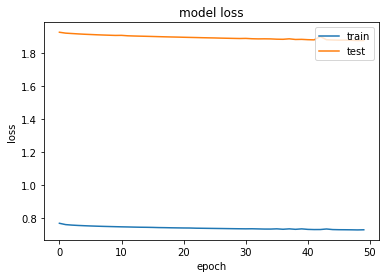

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [41]:
predictions = autoencoder.predict(myData8)
predictions

array([[0.0000000e+00, 8.7358952e-03, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5661048e+01, 5.7779078e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.3977280e-02, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.5385151e-03, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 4.1437149e-03, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [42]:
pre =pd.DataFrame(predictions)
pre.head(5)

,0,1,2,3,4,5
0,0.000000,0.008736,0.0,0.0,0.0,0.0
1,15.661048,5.777908,0.0,0.0,0.0,0.0
2,0.000000,0.023977,0.0,0.0,0.0,0.0
3,0.000000,0.022347,0.0,0.0,0.0,0.0
4,12.062043,4.456103,0.0,0.0,0.0,0.0


In [43]:
s2 = abs(myData8 - predictions)
s2['s2'] = s2.sum(axis=1)
s2.head()

,0,1,2,3,4,5,s2
0,0.004199,0.128906,0.126649,0.063994,0.067439,0.129863,0.521050
1,9.551694,16.941314,6.424920,0.221121,0.735808,2.137036,36.011893
2,0.008008,0.062135,0.073528,0.001193,0.140935,0.137290,0.423089
3,0.063215,0.122062,0.094958,0.105938,0.023812,0.069026,0.479011
4,1.074257,10.360090,1.005213,16.463523,15.612072,5.671343,50.186499


In [44]:
myData9['Score2'] = s2['s2']

In [45]:
myData9.head(5)

,0,1,2,3,4,5,Score1,Score2
0,0.004199,-0.120170,-0.126649,-0.063994,0.067439,0.129863,0.512314,0.521050
1,6.109354,22.719222,6.424920,-0.221121,0.735808,2.137036,38.347460,36.011893
2,0.008008,0.086112,-0.073528,-0.001193,0.140935,-0.137290,0.447066,0.423089
3,0.063215,-0.099715,-0.094958,-0.105938,-0.023812,-0.069026,0.456664,0.479011
4,13.136300,-5.903987,-1.005213,-16.463523,-15.612072,-5.671343,57.792439,50.186499


# Combine scores

In [46]:
myData9['Score1_Rank'] = myData9['Score1'].rank(ascending = 0)

In [49]:
myData9['Score2_Rank'] = myData9['Score2'].rank(ascending = 0)

In [219]:
myData9.head(5)

,0,1,2,3,4,5,Score1,Score2,Score1_Rank,Score2_Rank
0,0.004199,-0.120170,-0.126649,-0.063994,0.067439,0.129863,0.512314,0.521050,96825.0,86290.0
1,6.109354,22.719222,6.424920,-0.221121,0.735808,2.137036,38.347460,36.011893,354.0,341.0
2,0.008008,0.086112,-0.073528,-0.001193,0.140935,-0.137290,0.447066,0.423089,140797.0,191465.0
3,0.063215,-0.099715,-0.094958,-0.105938,-0.023812,-0.069026,0.456664,0.479011,123471.0,102714.0
4,13.136300,-5.903987,-1.005213,-16.463523,-15.612072,-5.671343,57.792439,50.186499,224.0,233.0


In [220]:
myData10  = myData9.copy()

In [221]:
myData10.head(5)

,0,1,2,3,4,5,Score1,Score2,Score1_Rank,Score2_Rank
0,0.004199,-0.120170,-0.126649,-0.063994,0.067439,0.129863,0.512314,0.521050,96825.0,86290.0
1,6.109354,22.719222,6.424920,-0.221121,0.735808,2.137036,38.347460,36.011893,354.0,341.0
2,0.008008,0.086112,-0.073528,-0.001193,0.140935,-0.137290,0.447066,0.423089,140797.0,191465.0
3,0.063215,-0.099715,-0.094958,-0.105938,-0.023812,-0.069026,0.456664,0.479011,123471.0,102714.0
4,13.136300,-5.903987,-1.005213,-16.463523,-15.612072,-5.671343,57.792439,50.186499,224.0,233.0


In [222]:
'''def combine_score1 (x):
    return x[['Score1_Rank', 'Score2_Rank']].min'''

"def combine_score1 (x):\n    return x[['Score1_Rank', 'Score2_Rank']].min"

In [223]:
'''%%time
myData10['Final_Rank1'] = myData10.apply(combine_score1, axis = 1)'''

"%%time\nmyData10['Final_Rank1'] = myData10.apply(combine_score1, axis = 1)"

In [224]:
%%time
myData10['Final_Rank'] = myData10[['Score1_Rank', 'Score2_Rank']].min(axis = 1)

CPU times: user 60.6 ms, sys: 22.5 ms, total: 83.2 ms
Wall time: 70.4 ms


In [225]:
def combine_score2 (x):
    return min([x['Score1_Rank'], x['Score2_Rank']])

In [226]:
'''%%time
myData10['Final_Rank3'] = myData10.apply(combine_score2, axis = 1)'''

"%%time\nmyData10['Final_Rank3'] = myData10.apply(combine_score2, axis = 1)"

In [227]:
'''%%time
for index in myData10.index:
    myData10.loc[index,'Final_Rank4']  = min([myData10.loc[index,'Score1_Rank'], myData10.loc[index,'Score2_Rank']])'''

"%%time\nfor index in myData10.index:\n    myData10.loc[index,'Final_Rank4']  = min([myData10.loc[index,'Score1_Rank'], myData10.loc[index,'Score2_Rank']])"

In [228]:
myData10.head(5)

,0,1,2,3,4,5,Score1,Score2,Score1_Rank,Score2_Rank,Final_Rank
0,0.004199,-0.120170,-0.126649,-0.063994,0.067439,0.129863,0.512314,0.521050,96825.0,86290.0,86290.0
1,6.109354,22.719222,6.424920,-0.221121,0.735808,2.137036,38.347460,36.011893,354.0,341.0,341.0
2,0.008008,0.086112,-0.073528,-0.001193,0.140935,-0.137290,0.447066,0.423089,140797.0,191465.0,140797.0
3,0.063215,-0.099715,-0.094958,-0.105938,-0.023812,-0.069026,0.456664,0.479011,123471.0,102714.0,102714.0
4,13.136300,-5.903987,-1.005213,-16.463523,-15.612072,-5.671343,57.792439,50.186499,224.0,233.0,224.0


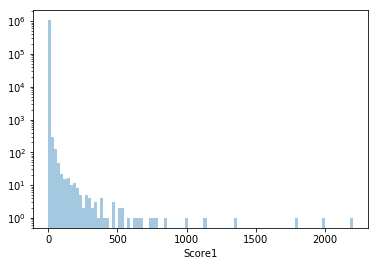

In [229]:
ax = sns.distplot(myData10['Score1'],bins=100, kde=False)
ax.set_yscale('log')
plt.savefig('Score1_log.png')

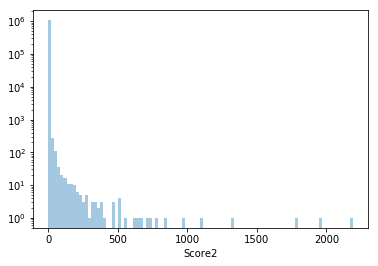

In [230]:
ax = sns.distplot(myData10['Score2'],bins=100, kde=False)
ax.set_yscale('log')
plt.savefig('Score2_log.png')

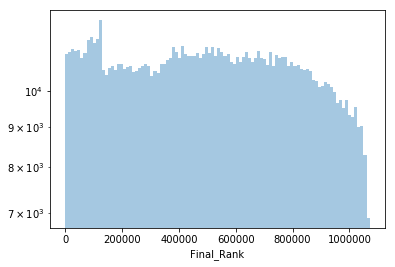

In [231]:
ax = sns.distplot(myData10['Final_Rank'],bins=100, kde=False)
ax.set_yscale('log')
plt.savefig('ScoreFinal_log.png')

In [234]:
myData10 = myData10[['Final_Rank']]

In [235]:
myData10 = myData10.sort_values(by = ['Final_Rank']).copy()

In [236]:
myData10.head(3)

,Final_Rank
632815,1.0
565391,2.0
917941,3.0


In [237]:
i = 0
fraudList = []
for index in myData10.index:
    if i > 20:
        break
    i = i + 1
    fraudList.append(index)

In [238]:
fraudList

[632815,
 565391,
 917941,
 1067359,
 750815,
 230595,
 585117,
 585438,
 691878,
 556608,
 690832,
 67128,
 920627,
 565397,
 585119,
 770593,
 248664,
 1067000,
 85885,
 153069,
 964933]

In [239]:
myData10.to_csv('fraudList(yifengData).csv')

# Check most 10 probable item in fraudList

In [240]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing 

In [255]:
file = 'NY property data.csv'
myData = pd.read_csv(file)
#myData.drop('Unnamed: 0', axis = 1 , inplace= True)

In [242]:
myData.head(3)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR


In [256]:
del_attribute = ['RECORD', 'BBLE', 'LOT', 'EASEMENT', 'BLDGCL', 'EXT', 
                 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'EXMPTCL', 'AVLAND2', 'AVTOT2',
                 'EXLAND2', 'EXTOT2', 'EXCD2', 'YEAR', 'VALTYPE', 'PERIOD']
for del_i in del_attribute: 
    myData.drop([del_i], axis = 1, inplace= True)

In [257]:
output1 = myData.iloc[fraudList].copy()

In [258]:
output1.to_excel('output1.xlsx')

In [254]:
file = 'cleanData_yifeng.csv'
myData = pd.read_csv(file)
myData.drop('Unnamed: 0', axis = 1 , inplace= True)

In [248]:
myData.iloc[fraudList]

,B,BLOCK,TAXCLASS,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,ZIP,BLDFRONT,BLDDEPTH
632815,4,1842,2,157.0,95.0,1.0,2.930000e+06,1.318500e+06,1.318500e+06,11373.0,1.0,1.0
565391,3,8590,4,117.0,108.0,3.0,4.326304e+09,1.946837e+09,1.946837e+09,11211.0,25.0,50.0
917941,4,14260,4,4910.0,100.0,3.0,3.740199e+08,1.792809e+09,4.668309e+09,11422.0,24.0,36.0
1067359,5,7853,1,1.0,1.0,2.0,8.360000e+05,2.880000e+04,5.016000e+04,10307.0,36.0,45.0
750815,4,6661,1B,1.0,1.0,2.0,4.720000e+05,1.492200e+04,2.466400e+04,11367.0,20.0,36.0
230595,2,4991,1B,1.0,1.0,2.0,3.800000e+05,1.293800e+04,2.087400e+04,10466.0,20.0,40.0
585117,4,420,4,298.0,402.0,20.0,3.443400e+06,1.549530e+06,1.549530e+06,11101.0,1.0,1.0
585438,4,459,4,94.0,165.0,10.0,3.712000e+06,2.520000e+05,1.670400e+06,11101.0,1.0,1.0
691878,4,3907,4,22.0,47.0,1.0,1.017000e+08,4.455000e+07,4.576500e+07,11421.0,27.0,47.0
556608,3,8312,4,35.0,50.0,1.0,1.360000e+08,6.075000e+07,6.120000e+07,11236.0,88.0,62.0


In [250]:
output2 = myData.iloc[fraudList].copy()
output2.to_excel('output1.xlsx')

In [ ]:
'''myData4['Base_lotarea'] = myData4['LTFRONT'] * myData4['LTDEPTH']
myData4['Base_bldarea'] = myData4['BLDFRONT'] * myData4['BLDDEPTH']
myData4['Base_bldvol'] = myData4['Base_bldarea'] * myData4['STORIES']

myData4['Base_r1'] = myData4['FULLVAL'] / myData4['Base_lotarea']
myData4['Base_r2'] = myData4['AVLAND'] / myData4['Base_lotarea']
myData4['Base_r3'] = myData4['AVTOT'] / myData4['Base_lotarea']

myData4['Base_r4'] = myData4['FULLVAL'] / myData4['Base_bldarea']
myData4['Base_r5'] = myData4['AVLAND'] / myData4['Base_bldarea']
myData4['Base_r6'] = myData4['AVTOT'] / myData4['Base_bldarea']

myData4['Base_r7'] = myData4['FULLVAL'] / myData4['Base_bldvol']
myData4['Base_r8'] = myData4['AVLAND'] / myData4['Base_bldvol']
myData4['Base_r9'] = myData4['AVTOT'] / myData4['Base_bldvol']'''

In [207]:
a = [0.50097735, 0.22722943, 0.07224364, 0.05208972, 0.04411291,
       0.04045688, 0.01658566, 0.0097775 , 0.00806087, 0.0051208 ,
       0.00489789, 0.00447862, 0.00317243, 0.0023302 , 0.00195961]

In [208]:
sum(a)

0.9934935099999999